# Project Description

## Motivation

<i><b>For Jan</b>: Insert business value</i>

Note: higher haplogroup resolution = more specific identification, more specific identification = more business value 


## Data Source

<i><b>For Jan</b>: Insert write up</i>

Note: https://www.sciencedirect.com/science/article/abs/pii/S0379073824001944

## Main Problem

<i><b>For Jan</b>: Insert main problem</i>

Sample: What models can be recommended that provides the highest accuracy depending on the resolution level?

## Limitations

If there is only 1 sample of a specific haplogroup, we will remove it from the dataset

Rationale: There is not enough samples to train the model and classify that specific haplogroup

# Methodology

Step 1. Identify the Business Problem

Step 2. Identify the Machine Learning Task

Step 3. Identify Key Evaluation Metrics

Step 4. Build and Test Machine Learning Models

## 1. Identify the Business Problem

<i><b>For Jan</b>: Rephrase motivation and main problem</i>

## 2. Identify the Machine Learning Task

What will the machine learning model do?
- Goal is to predict the class label (i.e. haplogroup) choice from a predefined list of states (i.e. 27 Y-STRs)

Classification Problem
- Input: Y-STRs (e.g Column DYS576, Column DYS627)
- Output: Haplogroups (i.e. Column haplogroup)

Since this is a classification problem, the following models will be utilized.
1. KNN
2. LDA
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting

For KNN, scaling will be applied during the data preprocessing to help with faster convergence, equal feature contribution, and improved performance [2][3].

Note that Logistic Regression (L1, L2) will not be used because the dataset includes classes (i.e. Haplogroups) that only occur once. One of the limitations of Logistic Regression is that overfitting may occur if the number of observations is less than the number of features [4]. Given the nature of the dataset, the ValueError "This solver needs samples of at least 2 classes in the data, but the data contains only one class" was raised, indicating that there are instances where there is insufficient samples for a particular class to train the model.

SVM will also not be used because the dataset has overlapping classes [5]. As an example, plotting two of the features (i.e. DYS627 and DYS576) show overlaps between the four haplogroups (i.e. R1a1a1b2a2, O2a2b1a1a1, O2a2a1, O2a2b1a2a1) as seen in 4.1 EDA

## 3. Identify Key Evaluation Metrics

<i><b>For Jan</b>: What evaluation metric will we use? If we will use Accuracy, explain why we will use Accuracy as the evalutation metric.

We also need to look for any industry benchmarks on Accuracy. Otherwise, we can proceed to using PCC.</i>

Evaluation Metrics: Classification
- Accuracy: use when the goal is to minimize the overall error state
- Precision: use when the cost of false positives is high
- Recall: use when the cost of false negatives is high
- F1-score: use if you want to optimize precision and recall at the same time

### PCC for Benchmark

# Project Description

## Motivation

<i><b>For Jan</b>: Insert business value</i>

Note: higher haplogroup resolution = more specific identification, more specific identification = more business value 


## Data Source

<i><b>For Jan</b>: Insert write up</i>

Note: https://www.sciencedirect.com/science/article/abs/pii/S0379073824001944

## Main Problem

<i><b>For Jan</b>: Insert main problem</i>

Sample: What models can be recommended that provides the highest accuracy depending on the resolution level?

## Limitations

If there is only 1 sample of a specific haplogroup, we will remove it from the dataset

Rationale: There is not enough samples to train the model and classify that specific haplogroup

# Methodology

Step 1. Identify the Business Problem

Step 2. Identify the Machine Learning Task

Step 3. Identify Key Evaluation Metrics

Step 4. Build and Test Machine Learning Models

## 1. Identify the Business Problem

<i><b>For Jan</b>: Rephrase motivation and main problem</i>

## 2. Identify the Machine Learning Task

What will the machine learning model do?
- Goal is to predict the class label (i.e. haplogroup) choice from a predefined list of states (i.e. 27 Y-STRs)

Classification Problem
- Input: Y-STRs (e.g Column DYS576, Column DYS627)
- Output: Haplogroups (i.e. Column haplogroup)

Since this is a classification problem, the following models will be utilized.
1. KNN
2. LDA
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting

For KNN, scaling will be applied during the data preprocessing to help with faster convergence, equal feature contribution, and improved performance [2][3].

Note that Logistic Regression (L1, L2) will not be used because the dataset includes classes (i.e. Haplogroups) that only occur once. One of the limitations of Logistic Regression is that overfitting may occur if the number of observations is less than the number of features [4]. Given the nature of the dataset, the ValueError "This solver needs samples of at least 2 classes in the data, but the data contains only one class" was raised, indicating that there are instances where there is insufficient samples for a particular class to train the model.

SVM will also not be used because the dataset has overlapping classes [5]. As an example, plotting two of the features (i.e. DYS627 and DYS576) show overlaps between the four haplogroups (i.e. R1a1a1b2a2, O2a2b1a1a1, O2a2a1, O2a2b1a2a1) as seen in 4.1 EDA

## 3. Identify Key Evaluation Metrics

<i><b>For Jan</b>: What evaluation metric will we use? If we will use Accuracy, explain why we will use Accuracy as the evalutation metric.

We also need to look for any industry benchmarks on Accuracy. Otherwise, we can proceed to using PCC.</i>

Evaluation Metrics: Classification
- Accuracy: use when the goal is to minimize the overall error state
- Precision: use when the cost of false positives is high
- Recall: use when the cost of false negatives is high
- F1-score: use if you want to optimize precision and recall at the same time

### PCC for Benchmark

## 4. Build and Test Machine Learning Models

In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

### 4.1 Data Preprocessing

In [3]:
# Step 1. Load dataset
df = pd.read_excel('Supplemental Processed Data Set.xlsx', sheet_name='S Table 1', skiprows=1)
df

,haplogroup,number of haplotypes,haplotype,total frequency,sampleID,population,frequency
0,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 31.0, 22.0, 10.0, 17.0, 16....",1.0,HLM100,Hulunbuir[Mongolian],1.0
1,NaN,NaN,"[19.0, 14.0, 22.0, 30.0, 22.0, 10.0, 18.0, 17....",1.0,HHM158,Hohhot[Mongolian],1.0
2,NaN,NaN,"[18.0, 14.0, 21.0, 31.0, 24.0, 10.0, 17.0, 16....",1.0,ODM030,Ordos[Mongolian],1.0
3,NaN,NaN,"[19.0, 14.0, 22.0, 30.0, 20.0, 10.0, 18.0, 17....",1.0,HLM178,Hulunbuir[Mongolian],1.0
4,O2a2b1a1a1a4a1,6.0,"[18.0, 12.0, 20.0, 29.0, 19.0, 9.0, 18.0, 14.0...",1.0,HHM088,Hohhot[Mongolian],1.0
...,...,...,...,...,...,...,...
4059,NaN,NaN,"[20.0, 12.0, 20.0, 28.0, 21.0, 10.0, 15.0, 15....",1.0,HaiN153(Han),Han,1.0
4060,NaN,NaN,"[18.0, 12.0, 21.0, 28.0, 21.0, 10.0, 17.0, 15....",1.0,GD-16(Han),Han,1.0
4061,NaN,NaN,"[19.0, 12.0, 21.0, 28.0, 21.0, 10.0, 18.0, 16....",1.0,JX-82(Han),Han,1.0
4062,NaN,NaN,"[16.0, 14.0, 21.0, 29.0, 22.0, 11.0, 16.0, 15....",1.0,HaiN139(Han),Han,1.0


In [4]:
# Step 2. Fill NaN values
df = df.ffill()
df

,haplogroup,number of haplotypes,haplotype,total frequency,sampleID,population,frequency
0,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 31.0, 22.0, 10.0, 17.0, 16....",1.0,HLM100,Hulunbuir[Mongolian],1.0
1,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 30.0, 22.0, 10.0, 18.0, 17....",1.0,HHM158,Hohhot[Mongolian],1.0
2,C2b1a1a,4.0,"[18.0, 14.0, 21.0, 31.0, 24.0, 10.0, 17.0, 16....",1.0,ODM030,Ordos[Mongolian],1.0
3,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 30.0, 20.0, 10.0, 18.0, 17....",1.0,HLM178,Hulunbuir[Mongolian],1.0
4,O2a2b1a1a1a4a1,6.0,"[18.0, 12.0, 20.0, 29.0, 19.0, 9.0, 18.0, 14.0...",1.0,HHM088,Hohhot[Mongolian],1.0
...,...,...,...,...,...,...,...
4059,O2a1c1a1a1,14.0,"[20.0, 12.0, 20.0, 28.0, 21.0, 10.0, 15.0, 15....",1.0,HaiN153(Han),Han,1.0
4060,O2a1c1a1a1,14.0,"[18.0, 12.0, 21.0, 28.0, 21.0, 10.0, 17.0, 15....",1.0,GD-16(Han),Han,1.0
4061,O2a1c1a1a1,14.0,"[19.0, 12.0, 21.0, 28.0, 21.0, 10.0, 18.0, 16....",1.0,JX-82(Han),Han,1.0
4062,O2a1c1a1a1,14.0,"[16.0, 14.0, 21.0, 29.0, 22.0, 11.0, 16.0, 15....",1.0,HaiN139(Han),Han,1.0


In [5]:
# Step 3. Split haplotype into separate columns
df = pd.concat([df, df['haplotype'].str.replace('[', '').str.replace(']', '').str.split(',', expand=True)], axis=1)
YSTRs = {0: "DYS576", 1: "DYS389 I", 2: "DYS635", 3: "DYS389 II", 4: "DYS627", 5: "DYS460", 6: "DYS458",
                 7: "DYS19", 8: "Y-GATA-H4", 9: "DYS448", 10: "DYS391", 11: "DYS456", 12: "DYS390", 13: "DYS438", 
                 14: "DYS392", 15: "DYS518", 16: "DYS570", 17: "DYS437", 18: "DYS385a", 19: "DYS385b", 20: "DYS449", 
                 21: "DYS393", 22: "DYS439", 23: "DYS481", 24: "DYS576a", 25: "DYS576b", 26: "DYS533"
}

df = df.rename(columns=YSTRs)
df = df.drop(columns=['haplotype'])
df

,haplogroup,number of haplotypes,total frequency,sampleID,population,frequency,DYS576,DYS389 I,DYS635,DYS389 II,...,DYS437,DYS385a,DYS385b,DYS449,DYS393,DYS439,DYS481,DYS576a,DYS576b,DYS533
0,C2b1a1a,4.0,1.0,HLM100,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,31.0,...,14.0,11.0,19.0,30.0,14.0,12.0,24.0,36.0,39.0,12.0
1,C2b1a1a,4.0,1.0,HHM158,Hohhot[Mongolian],1.0,19.0,14.0,22.0,30.0,...,14.0,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0
2,C2b1a1a,4.0,1.0,ODM030,Ordos[Mongolian],1.0,18.0,14.0,21.0,31.0,...,14.0,11.0,19.0,30.0,14.0,12.0,23.0,37.0,38.0,12.0
3,C2b1a1a,4.0,1.0,HLM178,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,30.0,...,14.0,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0
4,O2a2b1a1a1a4a1,6.0,1.0,HHM088,Hohhot[Mongolian],1.0,18.0,12.0,20.0,29.0,...,16.0,14.0,18.0,32.0,11.0,13.0,23.0,35.0,37.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,O2a1c1a1a1,14.0,1.0,HaiN153(Han),Han,1.0,20.0,12.0,20.0,28.0,...,14.0,13.0,13.0,31.0,13.0,11.0,25.0,37.0,40.0,11.0
4060,O2a1c1a1a1,14.0,1.0,GD-16(Han),Han,1.0,18.0,12.0,21.0,28.0,...,14.0,12.0,19.0,31.0,12.0,12.0,28.0,36.0,38.0,11.0
4061,O2a1c1a1a1,14.0,1.0,JX-82(Han),Han,1.0,19.0,12.0,21.0,28.0,...,14.0,12.0,19.0,33.0,12.0,12.0,26.0,36.0,39.0,11.0
4062,O2a1c1a1a1,14.0,1.0,HaiN139(Han),Han,1.0,16.0,14.0,21.0,29.0,...,14.0,12.0,18.0,29.0,14.0,12.0,23.0,37.0,39.0,11.0


### 4.2 Exploratory Data Analysis

Exploratory Data Analysis (EDA) was conducted to understand the structure, quality, and underlying patterns within the dataset. The dataset comprises multiple categorical and numerical variables, including haplogroup labels, population information, and allele repeat counts for several Y-STR genetic markers.

The goal of this analysis is to examine the distribution and variability of these markers across haplogroups and populations, assess data completeness, and identify potential relationships among genetic features. By systematically exploring marker distributions, inter-marker correlations, and population-level differences, this EDA aims to determine whether the dataset exhibits structured and non-random patterns which serves as empirical evidence for the feasibility of predictive modeling using machine learning.

#### 4.2.1. Data Overview

Shape:(4064, 33)

Count of missing values in dataset: 0



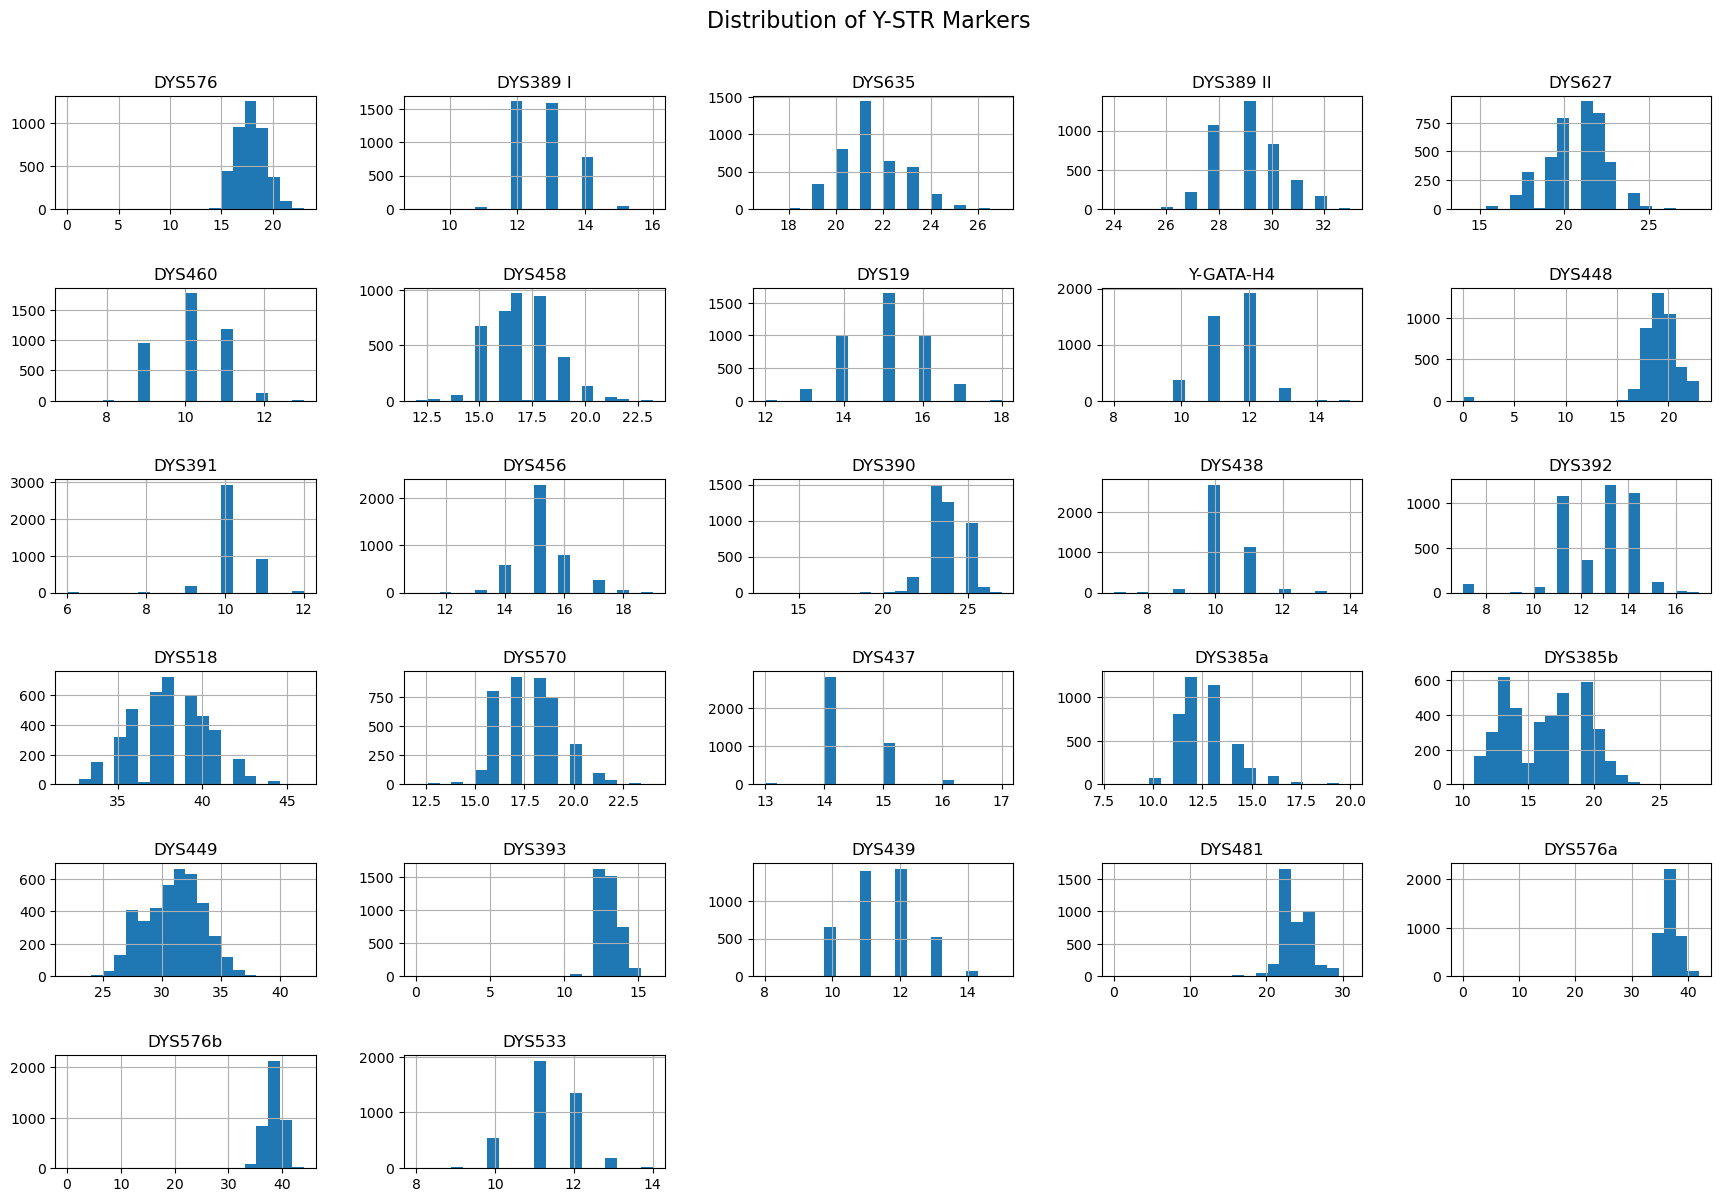

In [6]:
print(f"Shape:{df.shape}")
print(f"\nCount of missing values in dataset: {df.isna().sum().sum()}\n")

marker_cols = ['DYS576', 'DYS389 I', 'DYS635', 'DYS389 II', 'DYS627', 'DYS460', 'DYS458',
                 'DYS19', 'Y-GATA-H4', 'DYS448', 'DYS391', 'DYS456', 'DYS390', 'DYS438', 
                 'DYS392', 'DYS518', 'DYS570', 'DYS437', 'DYS385a', 'DYS385b', 'DYS449', 
                 'DYS393', 'DYS439', 'DYS481', 'DYS576a', 'DYS576b', 'DYS533']
id_cols = ['haplogroup', 'population', 'sampleID']
num_cols = ['number of haplotypes', 'total frequency', 'frequency']

df[marker_cols] = df[marker_cols].apply(pd.to_numeric, errors='coerce')
df[marker_cols].hist(figsize=(18, 12), bins=20)
plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.5)
plt.suptitle("Distribution of Y-STR Markers", fontsize=16, y=1.02)
plt.show()

##### Analysis

<b> To Jan: </b> Please verify the wordings if it is in accordance with the genetic/forensic terms. TY

The dataset comprises a total of 4,064 observations. Following data preprocessing, the final structure consists of 33 variables. A check for missing values showed that all columns are complete, making the dataset ready for analysis.

The Y-STR marker distributions reveal a mix of allele patterns across different loci. Some markers, like DYS449, DYS458, and DYS385a/b, show wide and often multimodal distributions, suggesting higher genetic diversity and stronger potential to distinguish between haplogroups or populations. In contrast, markers such as DYS391, DYS393, and DYS437 are more narrowly distributed, indicating conserved loci that contribute stability but less variation. Overall, the distinct and structured differences observed across markers point to meaningful genetic variation in the dataset, supporting its suitability for further modeling and classification analysis.

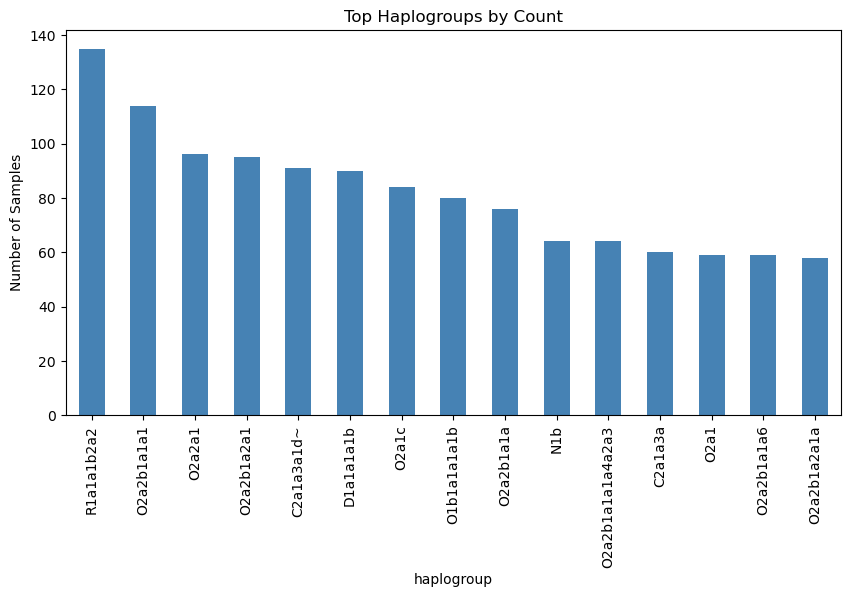

In [7]:
plt.figure(figsize=(10,5))
df['haplogroup'].value_counts().head(15).plot(kind='bar', color='steelblue')
plt.title("Top Haplogroups by Count")
plt.ylabel("Number of Samples")
plt.show()

##### Analysis

The bar chart illustrates the distribution of the top 15 haplogroups in the dataset. A small number of haplogroups account for most of the samples, while the rest appear less frequently. This imbalance may reflect actual population representation or sampling bias in the data. From a modeling perspective, the uneven class distribution highlights the need to address underrepresented haplogroups through <b><i> approaches such as stratified sampling or class weighting to ensure balanced model performance. </b></i>

<b> To All: Please comment about the bold, italicized part if we should be including that. </b>

In [17]:
hap_col = df.columns[0]
df["major_clade"] = df[hap_col].str.extract(r"^([A-Z])")
df.head()

,haplogroup,number of haplotypes,total frequency,sampleID,population,frequency,DYS576,DYS389 I,DYS635,DYS389 II,...,DYS385a,DYS385b,DYS449,DYS393,DYS439,DYS481,DYS576a,DYS576b,DYS533,major_clade
0,C2b1a1a,4.0,1.0,HLM100,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,31.0,...,11.0,19.0,30.0,14.0,12.0,24.0,36.0,39.0,12.0,C
1,C2b1a1a,4.0,1.0,HHM158,Hohhot[Mongolian],1.0,19.0,14.0,22.0,30.0,...,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0,C
2,C2b1a1a,4.0,1.0,ODM030,Ordos[Mongolian],1.0,18.0,14.0,21.0,31.0,...,11.0,19.0,30.0,14.0,12.0,23.0,37.0,38.0,12.0,C
3,C2b1a1a,4.0,1.0,HLM178,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,30.0,...,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0,C
4,O2a2b1a1a1a4a1,6.0,1.0,HHM088,Hohhot[Mongolian],1.0,18.0,12.0,20.0,29.0,...,14.0,18.0,32.0,11.0,13.0,23.0,35.0,37.0,11.0,O


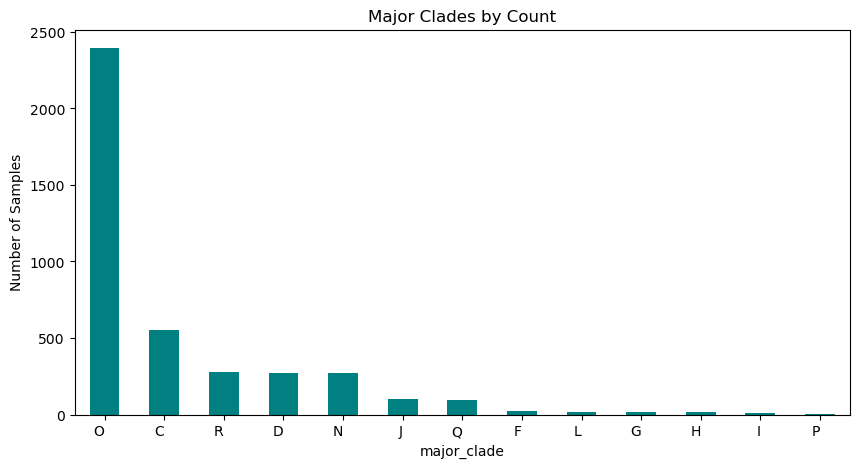

In [24]:
plt.figure(figsize=(10,5))
df['major_clade'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title("Major Clades by Count")
plt.ylabel("Number of Samples")

# Rotate x-axis labels
plt.xticks(rotation=360, ha='right')  # or 60, ha='center' depending on spacing

plt.show()

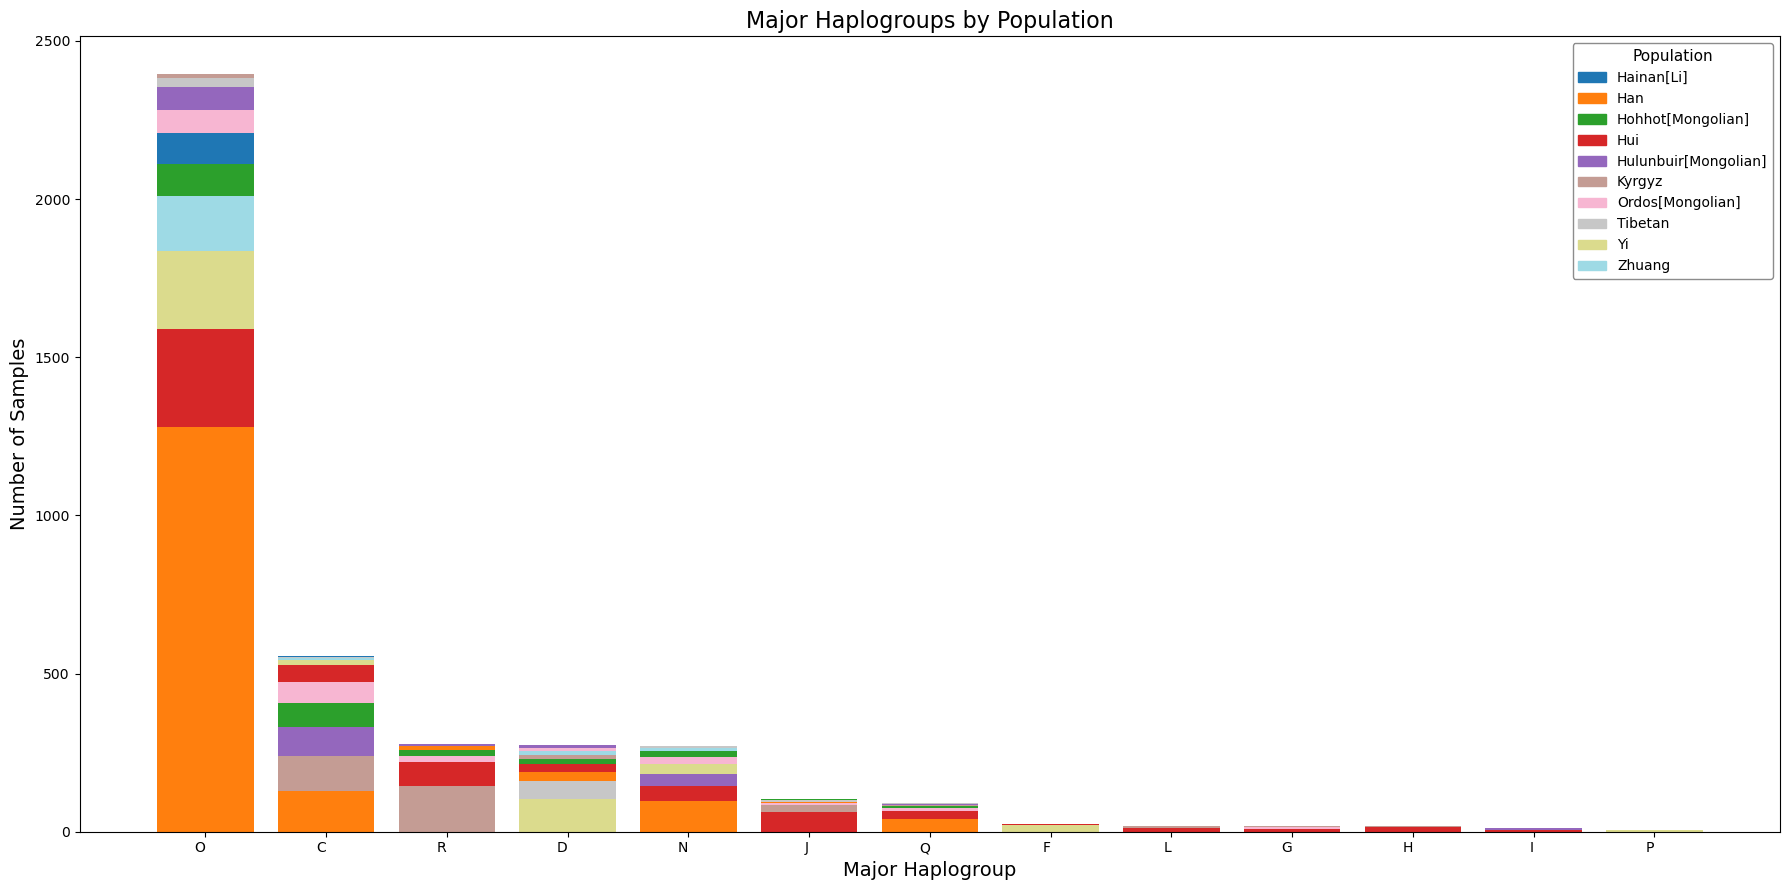

In [33]:
# Group and filter
grouped = df.groupby(['major_clade', 'population']).size().unstack(fill_value=0)
top_haps = grouped.sum(axis=1).nlargest(15).index
grouped_top = grouped.loc[top_haps]

# Create figure
fig, ax = plt.subplots(figsize=(18, 9))

# Assign one color per population
populations = grouped_top.columns
colors = plt.cm.tab20(np.linspace(0, 1, len(populations)))
color_map = dict(zip(populations, colors))

# Plot each bar manually
x = np.arange(len(grouped_top))
bottom = np.zeros(len(grouped_top))

for i in range(len(grouped_top)):
    row = grouped_top.iloc[i].sort_values(ascending=False)
    for pop, value in row.items():
        if value > 0:
            ax.bar(x[i], value, bottom=bottom[i], color=color_map[pop], width=0.8)
            bottom[i] += value

# Format axes
ax.set_xticks(x)
ax.set_xticklabels(grouped_top.index, rotation=360, ha='right')
ax.set_title("Major Haplogroups by Population", fontsize=16)
ax.set_xlabel("Major Haplogroup", fontsize=14)
ax.set_ylabel("Number of Samples", fontsize=14)

# Create custom legend INSIDE the plot
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[pop]) for pop in populations]
legend = ax.legend(
    handles,
    populations,
    title="Population",
    loc='upper right',        # Position legend inside top-right
    frameon=True,             # Add a frame
    fontsize=10,
    title_fontsize=11,
)
legend.get_frame().set_alpha(0.9)  # Make it slightly transparent
legend.get_frame().set_edgecolor('gray')

plt.tight_layout()
plt.show()

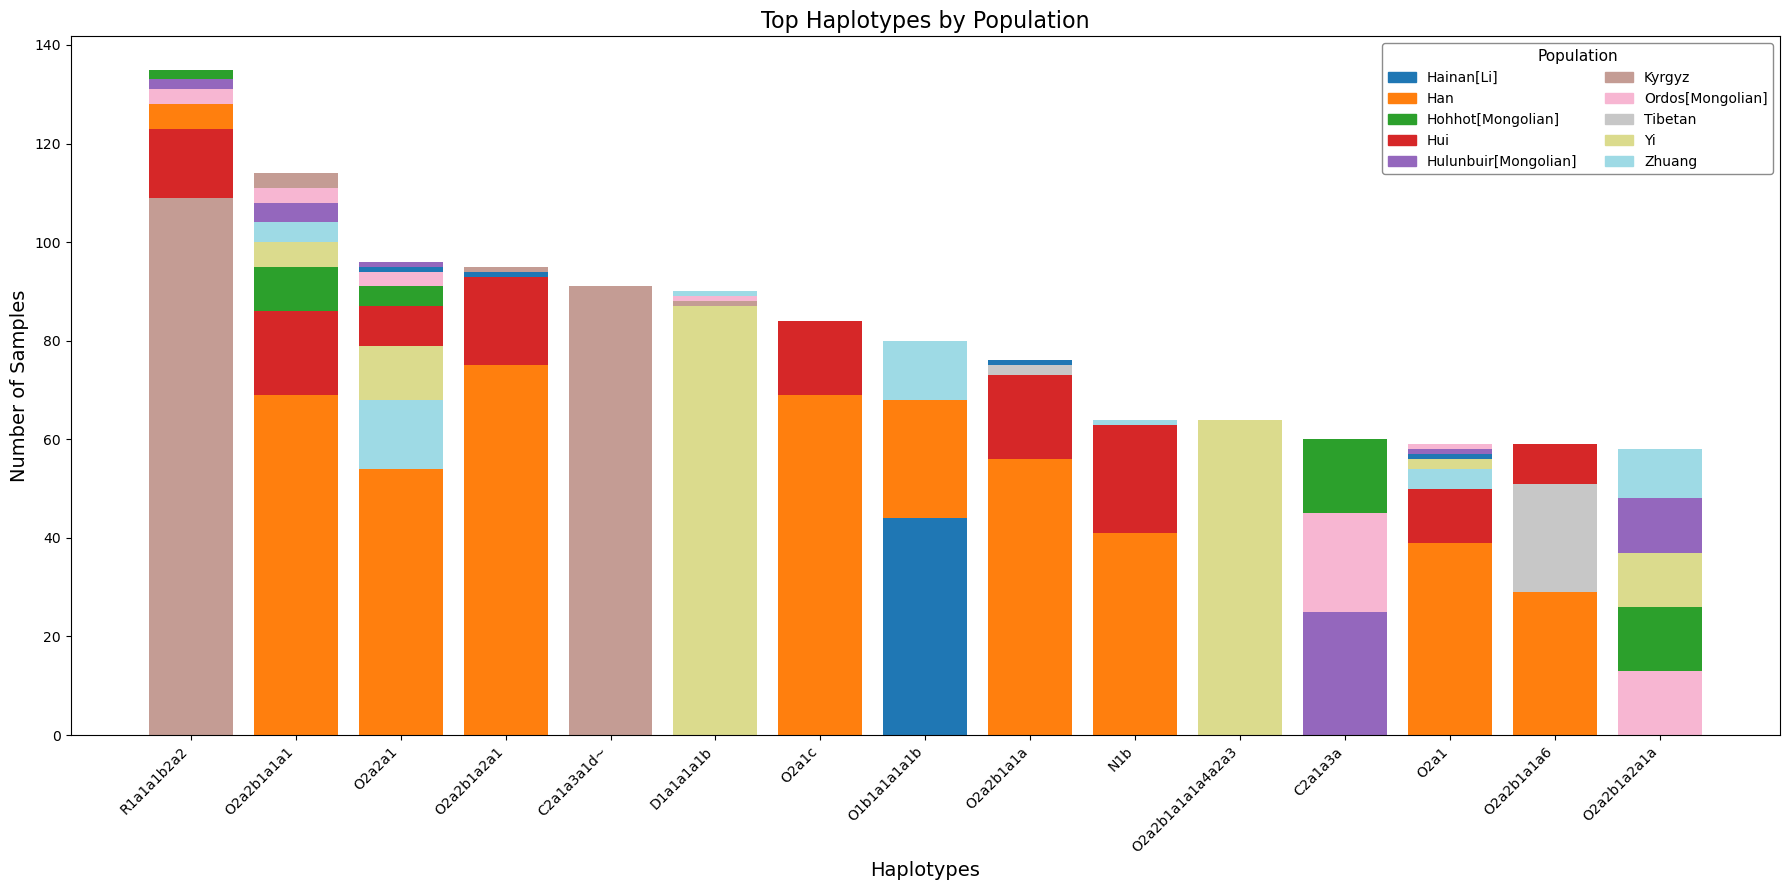

In [35]:
# Group and filter
grouped = df.groupby(['haplogroup', 'population']).size().unstack(fill_value=0)
top_haps = grouped.sum(axis=1).nlargest(15).index
grouped_top = grouped.loc[top_haps]

# Create figure
fig, ax = plt.subplots(figsize=(18, 9))

# Assign one color per population
populations = grouped_top.columns
colors = plt.cm.tab20(np.linspace(0, 1, len(populations)))
color_map = dict(zip(populations, colors))

# Plot each bar manually (no data labels)
x = np.arange(len(grouped_top))
bottom = np.zeros(len(grouped_top))

for i in range(len(grouped_top)):
    row = grouped_top.iloc[i].sort_values(ascending=False)
    for pop, value in row.items():
        if value > 0:
            ax.bar(x[i], value, bottom=bottom[i], color=color_map[pop], width=0.8)
            bottom[i] += value

# Format axes
ax.set_xticks(x)
ax.set_xticklabels(grouped_top.index, rotation=45, ha='right')
ax.set_title("Top Haplotypes by Population", fontsize=16)
ax.set_xlabel("Haplotypes", fontsize=14)
ax.set_ylabel("Number of Samples", fontsize=14)

# Create custom legend INSIDE the chart
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[pop]) for pop in populations]
legend = ax.legend(
    handles,
    populations,
    title="Population",
    loc='upper right',        # place inside plot
    frameon=True,
    fontsize=10,
    title_fontsize=11,
    ncol=2                    # multi-column layout
)
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('gray')

plt.tight_layout()
plt.show()

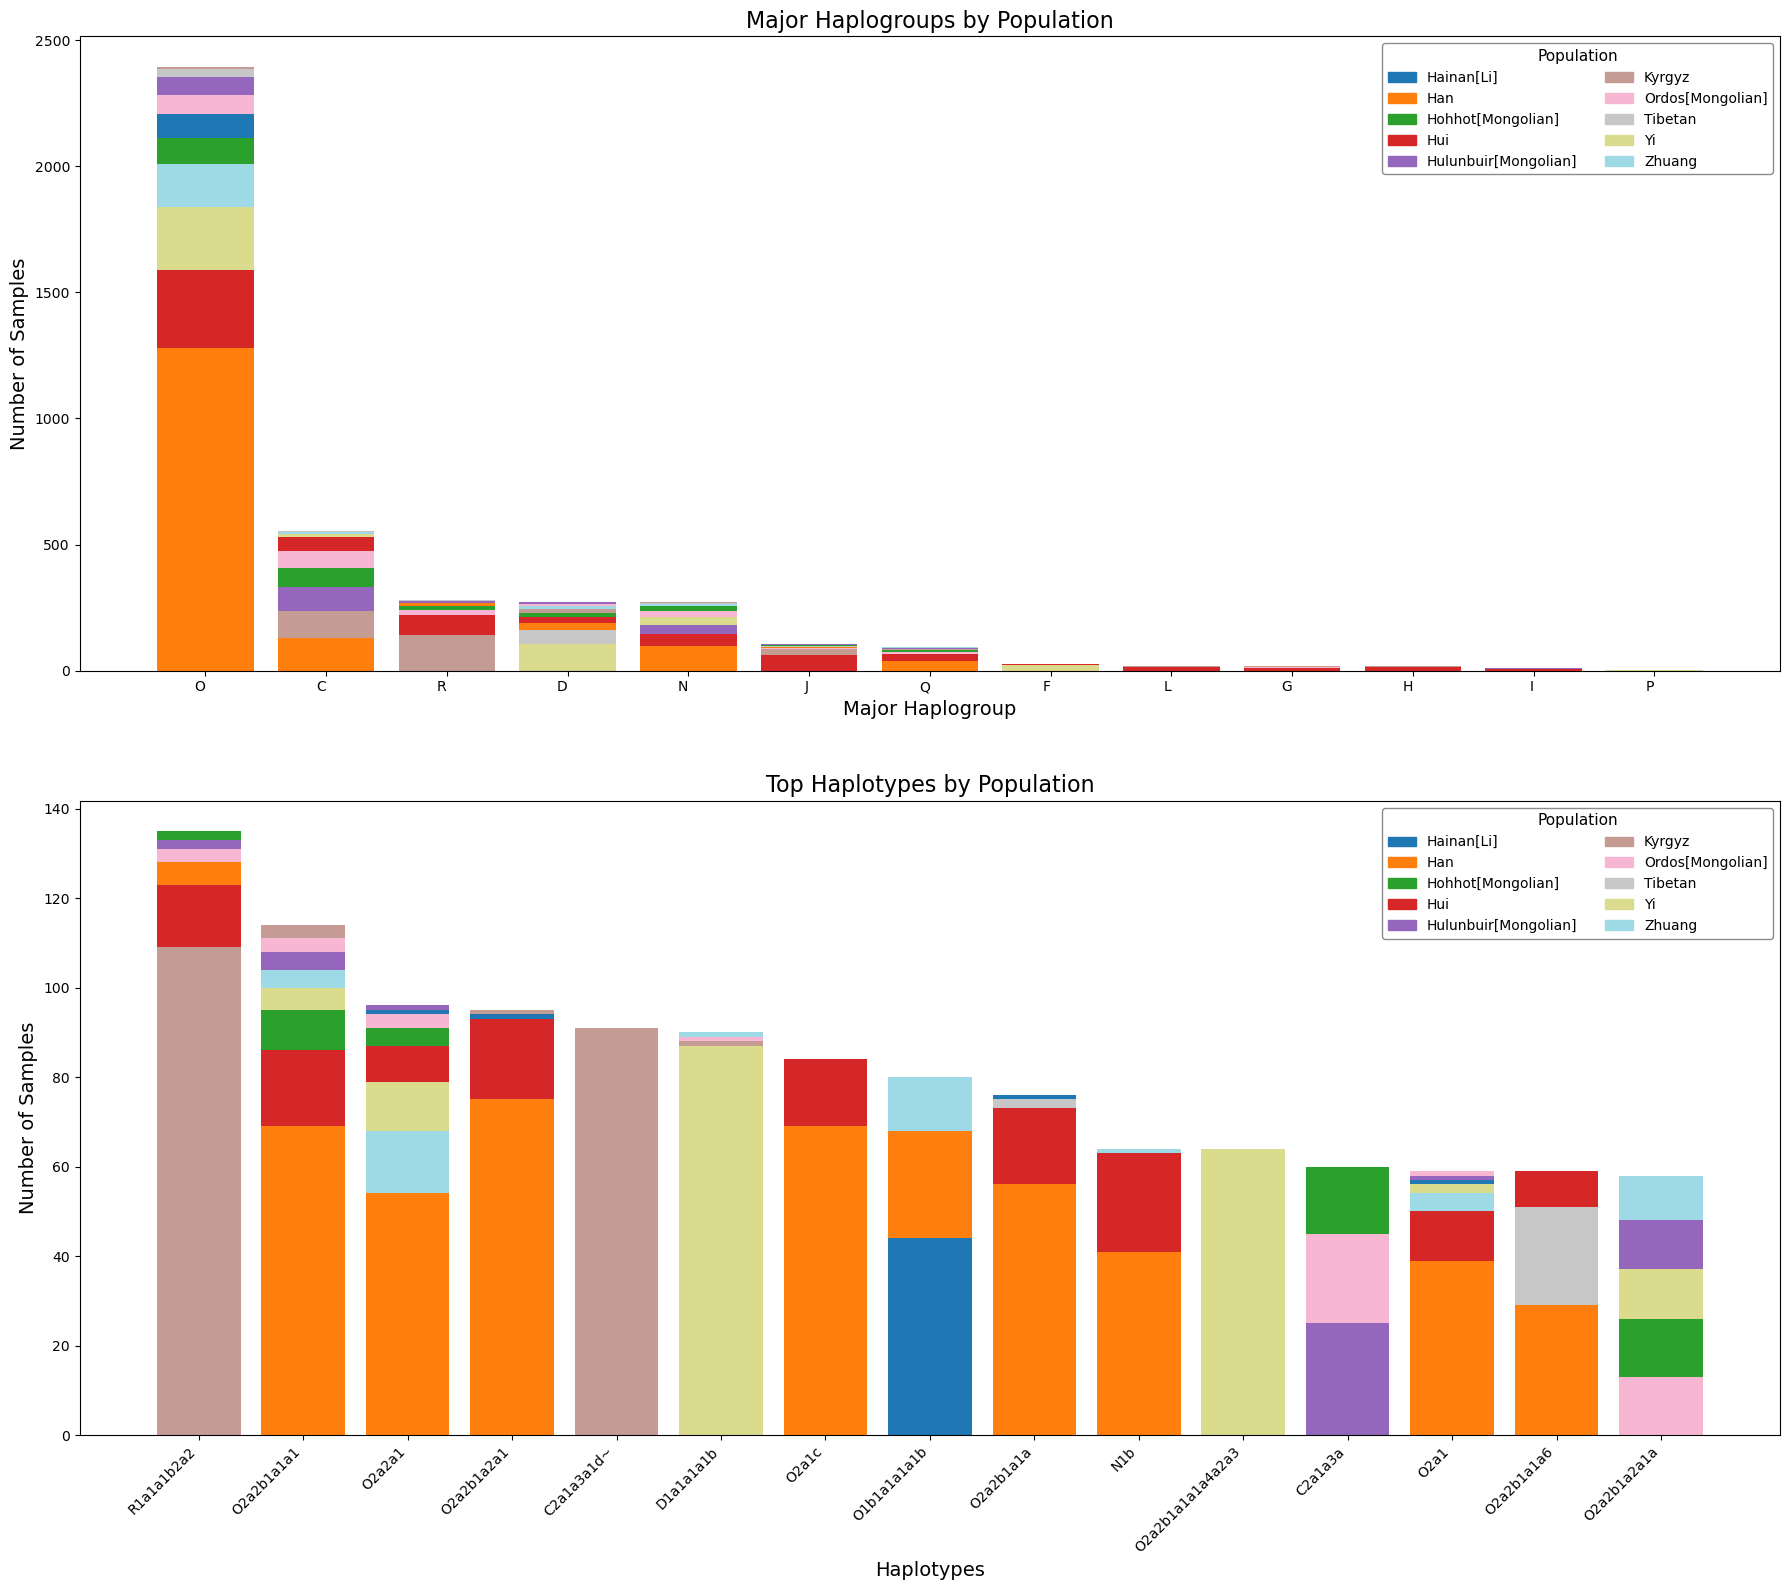

In [38]:
# Create combined figure with two subplots (top and bottom)
fig, axes = plt.subplots(2, 1, figsize=(18, 16))  # 2 rows, 1 column

# ---------- TOP PLOT: Major Haplogroups ----------
grouped_major = df.groupby(['major_clade', 'population']).size().unstack(fill_value=0)
top_major = grouped_major.sum(axis=1).nlargest(15).index
grouped_major_top = grouped_major.loc[top_major]

# Assign colors
populations = grouped_major_top.columns
colors = plt.cm.tab20(np.linspace(0, 1, len(populations)))
color_map = dict(zip(populations, colors))

# Plot
x = np.arange(len(grouped_major_top))
bottom = np.zeros(len(grouped_major_top))

for i in range(len(grouped_major_top)):
    row = grouped_major_top.iloc[i].sort_values(ascending=False)
    for pop, value in row.items():
        if value > 0:
            axes[0].bar(x[i], value, bottom=bottom[i], color=color_map[pop], width=0.8)
            bottom[i] += value

# Format top plot
axes[0].set_xticks(x)
axes[0].set_xticklabels(grouped_major_top.index, rotation=360, ha='right')
axes[0].set_title("Major Haplogroups by Population", fontsize=16)
axes[0].set_xlabel("Major Haplogroup", fontsize=14)
axes[0].set_ylabel("Number of Samples", fontsize=14)

# Legend (inside top plot)
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[pop]) for pop in populations]
legend = axes[0].legend(
    handles, populations,
    title="Population",
    loc='upper right',
    frameon=True,
    fontsize=10,
    title_fontsize=11,
    ncol=2
)
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('gray')

# ---------- BOTTOM PLOT: Haplogroups ----------
grouped_hap = df.groupby(['haplogroup', 'population']).size().unstack(fill_value=0)
top_haps = grouped_hap.sum(axis=1).nlargest(15).index
grouped_hap_top = grouped_hap.loc[top_haps]

# Plot
x = np.arange(len(grouped_hap_top))
bottom = np.zeros(len(grouped_hap_top))

for i in range(len(grouped_hap_top)):
    row = grouped_hap_top.iloc[i].sort_values(ascending=False)
    for pop, value in row.items():
        if value > 0:
            axes[1].bar(x[i], value, bottom=bottom[i], color=color_map[pop], width=0.8)
            bottom[i] += value

# Format bottom plot
axes[1].set_xticks(x)
axes[1].set_xticklabels(grouped_hap_top.index, rotation=45, ha='right')
axes[1].set_title("Top Haplotypes by Population", fontsize=16)
axes[1].set_xlabel("Haplotypes", fontsize=14)
axes[1].set_ylabel("Number of Samples", fontsize=14)

# Legend (inside bottom plot)
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[pop]) for pop in populations]
legend = axes[1].legend(
    handles, populations,
    title="Population",
    loc='upper right',
    frameon=True,
    fontsize=10,
    title_fontsize=11,
    ncol=2
)
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('gray')

# ---------- Final Layout ----------
plt.tight_layout(h_pad=4.0)  # Add space between plots
plt.show()

##### Analysis

The stacked bar chart highlights a clear class imbalance across haplogroups, with a few major lineages such as R1a1b2a2 and O2a2b1a1a1 contributing the majority of samples, while others appear far less frequently. Within these haplogroups, certain populations, particularly the Han, dominate the sample composition, resulting in uneven representation across both genetic and population groups. This type of imbalance is expected in Y-SNP and Y-STR datasets, as haplogroup frequencies reflect deep historical and demographic patterns, including population expansions, founder effects, and region-specific sampling priorities. Larger datasets and public repositories also tend to oversample major lineages associated with well-studied populations, further reinforcing this skew.

Despite this imbalance, developing a machine learning model remains highly beneficial. Properly designed models can help identify subtle genetic patterns within underrepresented haplogroups, highlight population-specific variations, and support predictive classification when new Y-chromosomal profiles are encountered. Techniques such as stratified sampling, class weighting, or oversampling can mitigate bias, allowing the model to generalize beyond the dominant haplogroups. In this way, machine learning serves as a powerful analytical tool to handle the inherent imbalance while uncovering structure and diversity within complex Y-chromosomal data.

##### Discussion: Class Imbalance & National Population Distribution

The predominance of certain haplogroups and populations in the dataset is not merely a sampling artefact. It reflects the actual demographic and genetic composition of China. According to the Y-Chromosome Haplotype Reference Database (YHRD), China’s national database contains over 132,000 haplotypes, the largest national collection within YHRD. Within this database, the Han Chinese meta-population accounts for the overwhelming majority of entries, with 98,957 haplotypes compared to only a few thousand from minority groups. Similarly, demographic data show that the Han ethnic group constitutes approximately 91% of China’s total population. This clear dominance at both the genetic and population levels helps explain the imbalance observed in the dataset.

Because Y-SNP and Y-STR data trace male lineage and paternal inheritance, haplogroups that are historically prevalent among the Han, such as O2 and its subclades, are naturally more frequent. In contrast, haplogroups associated with smaller ethnic minorities, such as Tibetan, Uyghur, or Mongolic lineages, are less represented. As a result, the dataset exhibits both between-class imbalance (some haplogroups having far more samples than others) and within-class imbalance (haplogroups dominated by one population, with limited diversity).

While such imbalance is expected due to historical demographic expansions, founder effects, and the concentration of YHRD submissions from major populations, it has implications for downstream modeling. A machine learning model trained directly on this data may overfit to the majority haplogroups and underperform for minority lineages. However, when properly handled—using stratified sampling, class weighting, or oversampling—machine learning can still uncover informative genetic patterns, identify rare variants, and support lineage prediction for underrepresented groups. Thus, even though the imbalance reflects China’s real population structure, modeling remains valuable for generalizing insights across both common and rare paternal lineages.

##### Addressing Class Imbalance in the Data

To manage the pronounced class imbalance in the Y-SNP/Y-STR dataset, we applied a singleton-handling procedure by dropping haplogroups represented by only one sample. These single-instance haplogroups, or singletons, offer limited statistical reliability and can introduce noise during model training, as the model cannot generalize from a class with no within-group variability. Removing them reduces the influence of outlier classes and allows the model to focus on haplogroups with sufficient representation for meaningful pattern learning. This approach improves both model stability and interpretability while retaining the dominant structure of the dataset.

While this reduces the total number of unique haplogroups, it yields a more balanced and analyzable dataset for machine learning. Combined with techniques such as stratified sampling during train-test splits and potential class weighting in model fitting, this preprocessing ensures that underrepresented but statistically meaningful haplogroups remain included, and that the final model reflects genuine lineage variation rather than noise from sparsely represented classes.

<b> Reference: </b>

https://yhrd.org/details/national_database/375-China

<b> From Mia: </b>

Hello, below blocks are not from me but I am not removing just in case it is needed :>

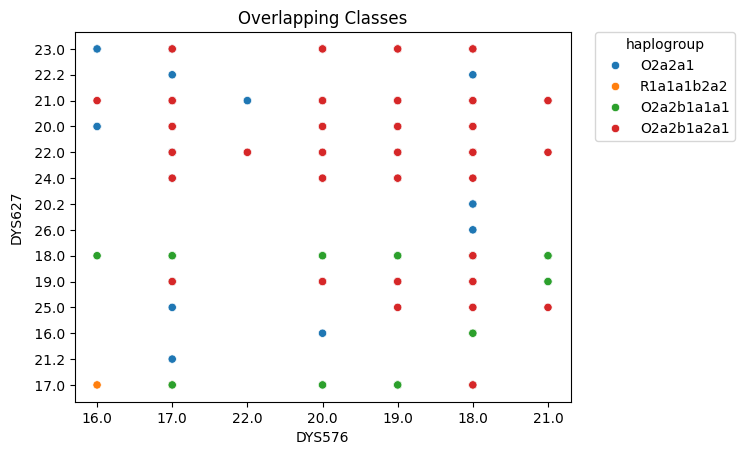

In [19]:
df_sample = df[(df['haplogroup'] == 'R1a1a1b2a2') | 
               (df['haplogroup'] == 'O2a2b1a1a1') | 
               (df['haplogroup'] == 'O2a2a1') | 
               (df['haplogroup'] == 'O2a2b1a2a1')]

df_sample = df_sample.drop(columns=['number of haplotypes', 'total frequency', 'sampleID','population','frequency'])
df_sample

ax = sns.scatterplot(data=df_sample, x='DYS576', y='DYS627', hue='haplogroup')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('Overlapping Classes')
plt.show()

In [ ]:
# PCC for benchmark

haplogroup_df = pd.DataFrame(df['haplogroup'].value_counts())
haplogroup_df['proportions'] = haplogroup_df['count'] / (haplogroup_df['count'].sum())
haplogroup_df['proportions^2'] = haplogroup_df['proportions']**2
pcc = haplogroup_df['proportions^2'].sum()
pcc_125 = pcc*1.25
print(f'1.25 PCC: {pcc_125:.4f}')

1.25 PCC: 0.0140


### 4.3 Build ML Models

#### KNN

In [20]:
Number_trials = 20

def train_knn(X, y):
    start_time = time.time()
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(X_train, y_train)
            acc_train.append(knn.score(X_train, y_train))
            acc_test.append(knn.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)

    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

In [24]:
X = df.iloc[:, 6:]
y = df.iloc[:, 0]

knn_df = train_knn(X,y)
print(knn_df)

['kNN', np.float64(0.5878444881889764), 'N_Neighbor = 1', 'NA', 121.83975386619568]


#### LDA

In [41]:
Number_trials = 20

def train_lda(X, y):
    start_time = time.time()
    solvers = ['svd', 'lsqr', 'eigen']
    score_train = []
    score_test = []
    coefs = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        acc_train = []
        acc_test = []

        for s in solvers:
            lda = LinearDiscriminantAnalysis(solver=s).fit(X_train, y_train)
            acc_train.append(lda.score(X_train, y_train))
            acc_test.append(lda.score(X_test, y_test))
            if hasattr(lda, 'coef_'):
                coefs.append(lda.coef_)

        score_train.append(acc_train)
        score_test.append(acc_test)

    #mean_coefs = np.mean(coefs, axis=0)
    score = np.mean(score_test, axis=0)
    #coef_flat = np.abs(mean_coefs).flatten()
    #top_idx = np.argmax(coef_flat) % X.shape[1]
    #top_predictor = X.columns[top_idx]

    run_time = (time.time() - start_time)
    #return ['LDA', np.amax(score), f'solver = {solvers[np.argmax(score)]}', top_predictor, run_time]
    return ['LDA', np.amax(score), f'solver = {solvers[np.argmax(score)]}', 'NA', run_time]

In [42]:
X = df.iloc[:, 6:]
y = df.iloc[:, 0]

lda_df = train_lda(X, y)
print(lda_df)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covarian

['LDA', np.float64(0.5834153543307086), 'solver = svd', 'NA', 3.384709119796753]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covarian

# Results

In [43]:
automl_df = pd.DataFrame(columns=['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time'])

automl_df.loc[0] = knn_df
automl_df.loc[1] = lda_df

automl_df = automl_df.drop(columns='Top Predictor Variable')
automl_df

,Machine Learning Method,Test Accuracy,Best Parameter,Run Time
0,kNN,0.587844,N_Neighbor = 1,121.839754
1,LDA,0.583415,solver = svd,3.384709


Note:
- GBM is prone to overfitting
- Consider doing a confusion matrix?? For random forest, check where mistakes/confusions were made

# Recommendations

# References

[1] https://www.sciencedirect.com/science/article/abs/pii/S0379073824001944

[2] https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35/#:~:text=IN%20DEPTH%20ANALYSIS,scaling%20in%20the%20X%2DY%20plane.

[3] https://www.geeksforgeeks.org/machine-learning/Feature-Engineering-Scaling-Normalization-and-Standardization/

[4] https://www.geeksforgeeks.org/data-science/advantages-and-disadvantages-of-logistic-regression/

[5] https://medium.com/@haj122/when-and-when-not-to-use-svms-e9edea04d6ba